# Pattern recognition - ViBOT MsCV

Guillaume Lemaitre - Fabrice Meriaudeau - Joan Massich

In [1]:

%matplotlib inline
%pprint off

# Matplotlib library
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

# MPLD3 extension
import mpld3

# Plotly library
import plotly.plotly as py
from plotly.graph_objs import *
py.sign_in('glemaitre', 'se04g0bmi2')

# Numpy library
import numpy as np

# To have some latex display
from IPython.display import display, Math, Latex


Pretty printing has been turned OFF


## Euclidean distance vs. Mahalanobis distance

(a) Define the two distances anatycally.

(b) Comment in no more than three sentences on the differences between the two distances.

(c) Assume two 2-D Gaussian distributions defined by $μ_1 = \left( \begin{array}{cc}
1 & 1 \end{array} \right)^t$ and $μ_2 = \left( \begin{array}{cc}
4 & 4 \end{array} \right)^t$ with the following covariances:

$\Sigma_1 = \left( \begin{array}{cc}
0.475 & -0.425 \\
-0.425 & 0.475 \end{array} \right)$ and $\Sigma_2 = \left( \begin{array}{cc}
1 & 0 \\
0 & 1 \end{array} \right)$

In [50]:

# Define the mean and standard deviation for each distribution
### Use np.matrix() to allow multiplication of matrices in the follow
mu1 = np.transpose(np.matrix('1 1'))
sigma1 = np.matrix('0.475, -0.425; -0.425, 0.475')
mu2 = np.transpose(np.matrix('4 4'))
sigma2 = np.matrix('1 0; 0 1')


Given a vector $x = \left( \begin{array}{cc}
2 & 2 \end{array} \right)^t$.

In [66]:

# Define x
### Use np.matrix() to allow multiplication of matrices in the follow
x = np.transpose(np.matrix('2 2'))


(d) Complete the following function to compute the Euclidean distance given $x$. To which class $x$ will be affected using Euclidean distance?

In [67]:

# Compute the Euclidean distance given x and the mean of a distribution
### cf. check the function numpy.sqrt()
### cf. check the function numpy.sum()
### cf. check the function numpy.square()
def EuclideanDistance(x, mu):
    return np.sum(np.square(x - mu))


In [68]:

# Compute the distance between x and each class center
d_c1 = EuclideanDistance(x, mu1)
d_c2 = EuclideanDistance(x, mu2)
if d_c1 < d_c2:
    print 'The vector x will be affected to the class 1 with an Euclidean distance equal to {}'.format(d_c1)
else:
    print 'The vector x will be affected to the class 2 with an Euclidean distance equal to {}'.format(d_c2)
    

The vector x will be affected to the class 1 with an Euclidean distance equal to 2


(e) Complete the following function to compute the Mahalanobis distance. To which class $x$ will be affected using Mahalanobis distance?

In [69]:
# Define the Mahalanobis distance
### cf. check the function numpy.transpose()
### cf. check the function numpy.linalg.inv()
def MahalanobisDistance(X, mean, cov):
    return np.transpose(X - mean)*cov*(X-mean)


In [71]:

# Compute the distance between x and each class center
d_c1 = MahalanobisDistance(x, mu1, sigma1)
d_c2 = MahalanobisDistance(x, mu2, sigma2)

if d_c1 < d_c2:
    print 'The vector x will be affected to the class 1 with an Mahalanobis distance equal to {}'.format(d_c1)
else:
    print 'The vector x will be affected to the class 2 with an Mahalanobis distance equal to {}'.format(d_c2)
    

The vector x will be affected to the class 1 with an Mahalanobis distance equal to [[ 0.1]]


(f) Generate 50 points from each distribution and plot them.

[ 1.00608595  1.07324846]


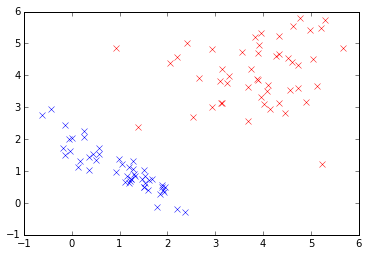

In [101]:

### cf. check the function numpy.random.multivariate_normal()
### cf. check the function np.asarray()
### cf. check the function np.squeeze()

# Generate the two distributions
### Use the function np.random.multivariate_normal() and transpose
#np.random.multivariate_normal(np.transpose(mu1), sigma1, 50)
x_d1, y_d1 = np.random.multivariate_normal(np.ravel(mu1), sigma1, 50).T
x_d2, y_d2 = np.random.multivariate_normal(np.ravel(mu2), sigma2, 50).T


# Plot the distributions
fig = plt.figure()
# Find the indexes of the first cluster
plt.plot(x_d1, y_d1, 'xb', label='Cluster #1')
plt.plot(x_d2, y_d2, 'xr', label='Cluster #2')

(g) Estimate the mean and covariance from the samples generated and compare with their theoritical values and comments briefly.

In [105]:

### cf. check the function numpy.mean()
### cf. check the function numpy.cov()

# Estimation of the mean and std of the first class
est_mean_d1 = np.mean(np.transpose([x_d1, y_d1]),axis=0)

est_cov_d1 = np.cov(sigma1)

# Estimation of the mean and std of the second class
est_mean_d2 = np.mean(np.transpose([x_d2, y_d2]),axis=0)
est_cov_d2 = np.cov(sigma2)

print 'First class statistics: mean = {} and covariance = {}'.format(est_mean_d1, est_cov_d1)
print 'Second class statistics: mean = {} and covariance = {}'.format(est_mean_d2, est_cov_d2)


First class statistics: mean = [ 1.00608595  1.07324846] and covariance = [[ 0.405 -0.405]
 [-0.405  0.405]]
Second class statistics: mean = [ 3.86351062  4.0744405 ] and covariance = [[ 0.5 -0.5]
 [-0.5  0.5]]


(h) Now, generate 1000 points and retry the experiments of (d) and (e).

First class statistics: mean = [ 1.01506371  0.98165259] and covariance = [[ 0.405 -0.405]
 [-0.405  0.405]]
Second class statistics: mean = [ 4.03676705  3.98839187] and covariance = [[ 0.5 -0.5]
 [-0.5  0.5]]


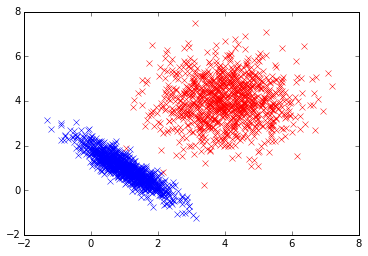

In [107]:

### cf. check the function numpy.random.multivariate_normal()
### cf. check the function np.asarray()
### cf. check the function np.squeeze()

# Generate the two distributions
### Use the function np.random.multivariate_normal() and transpose
x_d1, y_d1 = np.random.multivariate_normal(np.ravel(mu1), sigma1, 1000).T

x_d2, y_d2 = np.random.multivariate_normal(np.ravel(mu2), sigma2, 1000).T

### cf. check the function numpy.mean()
### cf. check the function numpy.cov()

# Estimation of the mean and std of the first class
est_mean_d1 = np.mean(np.transpose([x_d1, y_d1]),axis=0)

est_cov_d1 = np.cov(sigma1)

# Estimation of the mean and std of the second class
est_mean_d2 = np.mean(np.transpose([x_d2, y_d2]),axis=0)
est_cov_d2 = np.cov(sigma2)

print 'First class statistics: mean = {} and covariance = {}'.format(est_mean_d1, est_cov_d1)
print 'Second class statistics: mean = {} and covariance = {}'.format(est_mean_d2, est_cov_d2)

# Plot the distributions
fig = plt.figure()
# Find the indexes of the first cluster
plt.plot(x_d1, y_d1, 'xb', label='Cluster #1')
plt.plot(x_d2, y_d2, 'xr', label='Cluster #2')


(i) Define a function to compute the likelihood probability for a multivariate Gaussian density.

In [ ]:

# Define the function to compute the likelihood given the 
# distribution parameter
def LikelihoodND(x, mean, cov):
    return ...
    

(j) Generate the PDFs for each of these densities and plot them as a surface.

In [ ]:

# Generate the meshgrid
### cf. check the function numpy.linspace()
### cf. check the function numpy.meshgrid()
x = ...
y = ...
X, Y = np.meshgrid(...)

# Generate the first PDF
### cf. check the function numpy.zeros()
Z_d1 = np.zeros(np.shape(X))
...

# Generate the second PDF
### cf. check the function numpy.zeros()
Z_d2 = np.zeros(np.shape(X))
...

# Plot the surface
### cf. check matplotlib.plot_surface()
### cf. check matplotlib.colorbar()

data = Data([Surface(x=X, y=Y, z=Z_d1 + Z_d2, colorscale='Jet')])
layout = Layout(margin=Margin(l=0, r=0, b=0, t=0))
fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='densities-eucl-maha')


## Logistic regression classifier

In this section, the data correspond to the grades of two examaminations of 80 students from which 40 students were admitted while the others failed.

In [ ]:

# Load the data
data = np.asmatrix(np.loadtxt('./data/data.dat'))
labels = np.asmatrix(np.transpose(np.atleast_2d(np.loadtxt('./data/labels.dat'))))


The grades are stored in the `data` variable whereas `labels` variable corresponds to the admission boolean.

(a) Plot the data

In [ ]:

# Get the positive index
pos_idx = ...

# Get the negative index
neg_idx = ...

# Plot the data
...


We defined the sigmoid function as:

In [ ]:

# Definition of the sigmoid function
def sigmoid(x):
    return (1. / (1 + np.exp(-x)))


Now, the aim is to implement a logistic regression classifier. A logistic regression classifier return the probability such as:

$$p(y | x; \theta) = (h_{\theta}(x))^{y} (1 - h_{\theta}(x))^{1 - y} \ ,$$

with $h_{\theta}(x) = \frac{1}{1 + \exp(- \theta^{T} x)}$

where $x$ is the feature vector (i.e., the observations), $\theta$ is the set of parameters learned during the training stage.

The set of parameters $\theta$ can be found by maximizing the log likelihood which is defined as:

$$l(\theta) = \sum_{i = 1}^{N} - y_i \log h_{\theta}(x_i) - (1 - y_i) \log (1 - h_{\theta}(x_i)) $$

(b) Define the likelihood function in the following.


In [ ]:

# Define the likelihood
def likelihood(x, h, y):
    return ...


The optimal parameters $\theta$ can be found through numerical optimization by maximizing $l(\theta)$. Herein, Newton's method will be used to optimize $l(\theta)$.

Newton's method is an iterative procedure in which the set of parameters $\theta$ is updated such as:

$$\theta := \theta - H^{-1} \nabla_{\theta}l(\theta) \ , $$

(c) Complete the following function in order to follow the above definition.

In [ ]:

# Define the update rule of Newton's method
def update_newton(theta_old, grad, H):
    return ...


We recall that the gradient of the likelihood $l(\theta)$ is defined as:

$$\nabla_{\theta}l(\theta) = \frac{1}{m} x^{T}(h_{\theta}(x) - y) \ ,$$

(d) Complete the following Python function to cope with the previous definition. 

In [ ]:

# Define the gradient of the likelihood
def grad_likelihood(x, h, y):
    return ...
    

Finally the Hessian of the likelihood is defined as:

$$H = \frac{1}{m} x^{T} \text{diag}(h_{\theta}(x)) \text{diag}(1 - h_{\theta}(x)) x \ .$$

(e) Complete this Python function.

In [ ]:

# Define the Hessian
def hessian(x, h, y):
    return ...


(f) All the elements necessary to implement the Newton's optimisation have been defined. Complete the following code which will return the best set of parameters.

In [ ]:

# Implementation of the Newton's method
def arg_max_likelihood(x, y, theta, max_iter = 15, epsilon = .00001):
    
    # Updating loops
    it = 0
    err = float("inf")
    while((it < max_iter)&(err > epsilon)):
        # Store the theta values
        theta_old = theta
        
        # Compute h(x)
        h = ...
        # Compute the current likelihood
        l_theta = ...
        # Compute the first derivative of the likelihood
        grad = ...
        # Compute the hessian matrix
        H = ...
        
        # Update the set of parameters
        theta = ...
        
        # Print some information
        print 'Iteration #{0}: the cost function is equal to {1:.2f} and the parameters are {2}'.format(it, l_theta, np.ravel(theta.T))
        
        # Compute the convergence rate
        err = np.sum(np.abs(theta - theta_old))
        # Increment the number of iterations
        it += 1
        
    # Return the set of parameter
    return theta
    

(g) Apply Newton's method to the given dataset to find the best set of parameters $\theta$.

In [ ]:

# Include the intercept in the data
data_intercept = np.asmatrix(np.concatenate((np.ones((np.shape(data)[0], 1)), data), axis=1))

# Create a matrix for the set of parameters
theta = np.asmatrix(np.zeros((np.shape(data)[1] + 1, 1)))


In [ ]:

# Find the parameters which maximize the likelihood
theta = arg_max_likelihood(...)


(h) What is the probability that a student with a score of 20 on exam #1 and a score of 80 on exam #2 will not be admitted. It can be formalized as:
$$p(y = 0 | x) = 1 - p(y = 0 | x) \text{ with } x = \{20,80\}$$

In [ ]:

# Define the vector x 
x = np.matrix([[1., 20., 80.]])


In [ ]:

# Compute the probability
print 'The probability is {}'.format(...)


(i) Find the boundary decision analatically. We recall that the boundary is defined such as:
$$p(y = 1 | x) = p(y = 0 | x)$$

We know that:
$$p(y = 1 | x) = p(y = 0 | x)$$
Thus,
$$\frac{1}{1 + \exp( \theta^{T} x)} = \frac{\exp( \theta^{T} x)}{1 + \exp( \theta^{T} x)} \ , $$

$$\exp( \theta^{T} x) = 1 \ , $$

$$x_2 = -\frac{(\theta_1 x_1 + \theta_0)}{\theta_2} \ .$$

In [ ]:

# Get the positive index
pos_idx = ...

# Get the negative index
neg_idx = ...

# Plot the data
...

# Compute two points to draw a line
x1, x2 = 20., 65.
y1 = ...
y2 = ...

# Draw the line
...


As reference, we give an example of the same classifier already implemented in scikit-learn.

In [ ]:

# Import the right library
from sklearn.linear_model import LogisticRegression

# Call the constructor
lg_reg = LogisticRegression()
lg_reg.fit(data, np.ravel(labels))

# Compute the probability for x = {20., 80.}
x = np.matrix([[20., 80.]])
prob_y = lg_reg.predict_proba(x)

# Print the results
print 'The probability for x to be affected to class #0 is {}'.format(prob_y[0, 0])
print 'The probability for x to be affected to class #1 is {}'.format(prob_y[0, 1])

## Bayesian classification for binary classification in a 1-D feature space

In a 1-D feature space, the conditional density of the class #1 ($c_1$) is following a normal distribution (i.e., Gaussian distribution) with the following mean and variance $ \mu_{1} = 0, \ \sigma_{1}^{2} = 5$. The class #2 ($c_2$) conditional density is also defined by a normal distribution with $ \mu_{2} = 2, \ \sigma_{2}^{2} = 1$.

(a) Give the mathematical representation of the two conditional densities.

$p(X | c_1) = \frac{1}{\sqrt{2\pi}\sigma_{1}^{2}}\exp{-\frac{(x - \mu_{1})^{2}}{2 \sigma_{1}^{2}}}$

$p(X | c_2) = \frac{1}{\sqrt{2\pi}\sigma_{2}^{2}}\exp{-\frac{(x - \mu_{2})^{2}}{2 \sigma_{2}^{2}}}$

(b) Complete the following Python function to return a Gaussian PDF for a given vector $X$, mean $\mu$ and standard deviation $\sigma$. 

In [ ]:

# Create a function in order to generate a Gaussian function
### cf. check the function numpy.sqrt()
### cf. check the function numpy.exp()
### cf. check the operator ** - power operator
def Gaussian1D(X, mu, sigma):
    return ...


(c) Generate both $p(X | c_1)$ and $p(X | c_2)$.

In [ ]:

# Define the mean and standard deviation for each distribution
mu1, sigma1 = ...
mu2, sigma2 = ...

# Generate X
### cf. check the function numpy.linspace()
X = ...

# Compute the different PDFs for both class
pdf1 = ...
pdf2 = ...


(d) Plot the generated density functions.

In [ ]:

# Plot the pdfs
### cf. check the function matplotlib.plot()
### cf. check the parameter label
### cf. check the function matplotlib.legend()
### cf. check the function matplotlib.show()
...


(e) Give the equation for the likelihood ratio and plot this ratio for a given vector $X$. Plot the decision constant    

$\Lambda(x) = \frac{p(x|c_1)}{p(x|c_2)} = \frac{1}{\sqrt{5}} \exp(0.4x^2 - 2x + 2)$

In [ ]:

# Generate X
### cf. check the function numpy.linspace()
X_ratio = ...

# Generate the ratio from the analytical expression
### cf. check the function numpy.sqrt()
### cf. check the function numpy.exp()
### cf. check the operator ** - power operator
likelihood_ratio = ...

# Plot the likelihood ratio
### cf. check the function matplotlib.title()
### Plot the likelihood ratio using the previous densities generated
...
### Plot the likelihood ratio using the analytical expression
...
### Plot the decision constant
...


(f) Complete the following Python function to return the likelihood probability given a scalar $x$.

In [ ]:

# Function to return the likelihood probability
def Likelihood1D(x, mu, sigma):
    return ...


(g) Complete the following Python function to return the posterior probability given a scalar $x$.

In [ ]:

# Function to return the posterior probability
def Posterior1D(x, mu, sigma, prior):
    return ...


(h) Assume the *a-priori* probabilities $P(c_1) = P(c_2) = 0.5$ and $x = 3$

In [ ]:

# Define the observation
x = 3.

# Define the prior probability
p_c1, p_c2 = .5, .5


- Using the Maximum Likelihood (ML) approach, which class will be affected to $x$?

In [ ]:

# Compute the likelihood for the two classes
p_x_c1 = ...
p_x_c2 = ...

display(Math('p(x = 3 | c_1)'), p_x_c1)
display(Math('p(x = 3 | c_2)'), p_x_c2)

# In the ML sense, check which class to affect x
...


- Using the Maximum *a-posteriori* (MAP) approach, which class will be affected to $x$?

In [ ]:

# Compute the likelihood for the two classes
p_c1_x = ...
p_c2_x = ...

display(Math('p(c_1 | x = 3)'), p_c1_x)
display(Math('p(c_2 | x = 3)'), p_c2_x)

# In the ML sense, check which class to affect x
...


- How many decision regions do you observe? Describe those regions based on your sketch.

In [ ]:

# Plot the previous pdf - refer question (d)
...

# Plot the different region of decision
### cf. check the function matplotlib.fill_between()
...


Three regions observable

- Write the integral equation that gives the overall probability of error based on the MAP method.

In [ ]:

# Compute the classification error
p_error = ...

display(Math('p(\epsilon)'), p_error)


- Find the decision boundary (or boundaries) using analytical methods (not the sketch).

(i) Now, assume the *a-priori* probabilities $P(c_1) = 0.8$ and $P(c_2) = 0.2$, $x = 3$ and a zero-one loss function:


In [ ]:

# Define the observation
x = 3.

# Define the prior probability
p_c1, p_c2 = .8, .2


- Sketch the product of the conditional density and its corresponding prior for both classes $c_1$ and $c_2$

In [ ]:

# Compute the product of the previous densities with their priors
...

# Normalise the densities
...

# Plot the previous pdf
...


- Using the Maximum Likelihood (ML) approach, which class will be affected to an observation such as $x = 3$?

In [ ]:

# Compute the likelihood for the two classes
...

display(Math('p(x = 3 | c_1)'), p_x_c1)
display(Math('p(x = 3 | c_2)'), p_x_c2)

# In the ML sense, check which class to affect x
...


- Using the Maximum *a-posteriori* (MAP) approach, which class will be affected to $x$?

In [ ]:

# Compute the likelihood for the two classes
...

display(Math('p(c_1 | x = 3)'), p_c1_x)
display(Math('p(c_2 | x = 3)'), p_c2_x)

# In the ML sense, check which class to affect x
...


- How many decision regions do you observe? Describe those regions based on your sketch.

In [ ]:

# Plot the previous pdf - refer question (d)
...
# Plot the different region of decision
### cf. check the function matplotlib.fill_between()
...


Only one region observable

- Write the integral equation that gives the overall probability of error based on the MAP method.

In [ ]:

# Compute the classification error
p_error = ...

display(Math('p(\epsilon)'), p_error)


- Find the decision boundary (or boundaries) using analytical methods (not the sketch).

- What kind of loss values (rather than zero-one) would alter the decisions?

## Naive Bayes classifier applied for segmentation in retina images

In [ ]:

# Import scikit-image for input-output manipulation
from skimage import io
from skimage import img_as_float


(a) From the `data` folder load the training image `training.tif`, the vessel image `training_vessels.gif` and the mask FOV `training_mask.gif`

In [ ]:

# Load the images
### Use the function img_as_float()
### Use the function io.imread()
train_im = ...
train_ve = ...
train_ma = ...

# Render the image
fig, ax = plt.subplots(1, 3)
ax1, ax2, ax3 = ax.ravel()

ax1.imshow(train_im)
ax1.set_title('Original image')
ax1.axis('off')

ax2.imshow(train_ve, cmap=plt.cm.gray)
ax2.set_title('Vessel mask')
ax2.axis('off')

ax3.imshow(train_ma, cmap=plt.cm.gray)
ax3.set_title('Fovea mask')
ax3.axis('off')

plt.show()


In [ ]:

# Import the scikit-image for color conversion
from skimage import color
# Import morpho element
from skimage.morphology import square
# Import the median filtering
from skimage.filter.rank import median

# Function to pre process the images
def PreProcessing(rgb_image):
    # Convert RGB to LAB color space
    lab_image = img_as_float(color.rgb2lab(rgb_image))
    
    # Normalize each channel between 0 and 1
    lab_image[:, :, 0] = normalise_im(lab_image[:, :, 0])
    lab_image[:, :, 1] = normalise_im(lab_image[:, :, 1])
    lab_image[:, :, 2] = normalise_im(lab_image[:, :, 2])
    
    # Obtain a background image through median filtering
    background_im = img_as_float(median(lab_image[:, :, 0], square(15)))
    tmp_im = lab_image[:, :, 0] - background_im
    tmp_im[tmp_im > 0] = 0
    lab_image[:, :, 0] = - tmp_im
    lab_image[:, :, 0] = normalise_im(lab_image[:, :, 0])
    
    return lab_image

def normalise_im(im_2d):
    return (im_2d[:, :] - np.min(im_2d[:, :])) / (np.max(im_2d[:, :]) - np.min(im_2d[:, :]))


In [ ]:

# Pre-process the training image and render it
pre_proc_im = PreProcessing(train_im)
fig, ax = plt.subplots(1, 3)
ax1, ax2, ax3 = ax.ravel()

ax1.imshow(pre_proc_im[:, :, 0], cmap=plt.cm.gray)
ax1.set_title('Vessel')
ax1.axis('off')

ax2.imshow(pre_proc_im[:, :, 1], cmap=plt.cm.gray)
ax2.set_title('Channel A')
ax2.axis('off')

ax3.imshow(pre_proc_im[:, :, 2], cmap=plt.cm.gray)
ax3.set_title('Channel B')
ax3.axis('off')

plt.show()


(b) Create the positive and negative samples from the 3 colour spaces and with the vessel image and the mask image. Your feature space will be three dimensional. Remember that each pixel is a sample with 3 features, with a positive class if it lays to the vessels and negative otherwise.

In [ ]:

# Create the positive samples
idx_pos_y, idx_pos_x = ...
pos_fea = ...

# Create the negative samples
idx_neg_y, idx_neg_x = ...
neg_fea = ...


(c) Plot the 1-D histogram of each feature seperately and evaluate the separability of the classes.

In [ ]:

# Define the number of bin
nb_bins = 50

### 1st feature ###
plt.figure()
# For the positive sample
n, bins, patches = plt.hist(...)
plt.setp(...)
# For the neg sample
n, bins, patches = plt.hist(...)
plt.setp(...)
plt.title('1st feature PDF')

### 2nd feature ###
plt.figure()
# For the positive sample
n, bins, patches = plt.hist(...)
plt.setp(...)
# For the neg sample
n, bins, patches = plt.hist(...)
plt.setp(...)
plt.title('2nd feature PDF')

### 3rd feature ###
plt.figure()
# For the positive sample
n, bins, patches = plt.hist(...)
plt.setp(...)
# For the neg sample
n, bins, patches = plt.hist(...)
plt.setp(...)
plt.title('3rd feature PDF')

plt.show()


(d) Assuming a normal distribution of the samples train a Naive Bayes classifier.

In [ ]:

# Define the prior of each class
prior_pos, prior_neg = .5, .5

# Estimation of the mean and std of the first class
est_mean_pos = ...
est_cov_pos = ...

# Estimation of the mean and std of the second class
est_mean_neg = ...
est_cov_neg = ...


(e) Load the test image `test.tif` and use the previous model learned to segment the image.

In [ ]:

# Function to return the posterior probability for N-D
def PosteriorND(x, mu, sigma, prior):
    return LikelihoodND(x, mu, sigma) * prior


In [ ]:

# Load the image
test_im = ...
test_ma = ...

# Pre-process the image
pre_proc_im_test = PreProcessing(test_im)

# Build the feature vector
idx_test_y, idx_test_x = ...
test_fea = ...

# Pre allocation
seg_im = np.zeros(np.shape(test_ma))
# Classify each sample
for f in range(0, np.size(test_fea, 0)):
    # Estimate the probability for the positive class
    p_pos_x = ...
    # Estimate the probability for the negative class
    p_neg_x = ...
    # Decide depending on the ratio
    if ((p_pos_x / p_neg_x) > 1.0):
        seg_im[idx_test_y[f]][idx_test_x[f]] = 1.0
            
# Show the results
fig, ax = plt.subplots()
ax.imshow(seg_im, cmap=plt.cm.gray)
ax.axis('off')

plt.show()